# Supervised Learning
In this notebook we will explain briefly the most used supervised learning algorithms for both classificaiton and regression and we will apply them to a real datasets and compare the performances. We will use the Python package [SKLearn](https://scikit-learn.org/) that implements a lot of machine learning algorithms.

Before comparing the models on the selected dataset let us introduce a fundamental concept that will help us understand better the concepts of overfitting, underfitting and the regularization techniques: the bias-variance decomposition.

## The Curse of Dimensionality
The curs of dimensionality refers to the problems encountered when learning in high dimensions. In particular the volume of the data space increases exponentially with respect to the number of dimensions, and the space becomes sparse. This means that the density of the data space decreases when the number of dimensions increases, meaking more difficult to learn patterns in data because I've fewer examples per volume unit. 

## Bias Variance Decomposition
The error of an estimator (that in our case is the Machine Learning model) can be decomposed into two terms: a bias term and a variance term. Imagine we could train the same model on many different datasets. The bias tells how much is the error if we take the average of the predictions from these models, while the variance term is the variance of predictions obtained by these models. Matematically 
$$
Err(x) = \mathbb{E}_{\hat{f}}[(\mathbb{E}_{\hat{f}}[\hat{f}(x)]-f(x))^2] + \mathbb{E}_{\hat{f}}[(\hat{f}(x)-\mathbb{E}_{\hat{f}}[\hat{f}(x)])^2]
$$
Where $\hat{f}$ is the predicted function and $f$ is the true function. Note the expectation over the models trained on different datasets.
Bias and variance are represented in the following image, borrowed from this [great article](http://scott.fortmann-roe.com/docs/BiasVariance.html) on bias-variance decomposition:
<p align="center">
  <img src="../imgs/biasvariance.png"/ width=30%>
</p>
As we can see from the picture, an estimator with high bias and low variance will return on average a value that is different from the true value, but the predicted values will be similar. While an estimator with low bias and high variance will return the correct value on average, but the predicted values will change a lot. 
The bias variance decomposition is a different way to express the concepts of overfitting and underfitting. If we increase the model capacity we reduce the bias but we might increase variance and vice versa. As shown by the figure:
<p align="center">
  <img src="../imgs/overunderfitting.png"/ width=30%>
</p>



## Regression
For the regression models we will use the Diabetes dataset that represents patients in a 10-dimensional feature space, where the features are:
- age age in years
- sex
- bmi body mass index
- bp average blood pressure
- s1 tc, total serum cholesterol
- s2 ldl, low-density lipoproteins
- s3 hdl, high-density lipoproteins
- s4 tch, total cholesterol / HDL
- s5 ltg, possibly log of serum triglycerides level
- s6 glu, blood sugar level

The feature variables are mean centered and scaled by the standard deviation times the square root of n_samples.
The targets $Y$ are integers in the range $[25,346]$ and are a quantitative measure of disease progression one year after the measurements.

In [34]:
import numpy as np
import sklearn
from sklearn.datasets import load_diabetes

In [35]:
X,Y = load_diabetes(return_X_y=True)
print(f"{X.shape},{Y.shape}")

(442, 10),(442,)


We use 90% of the data for training and 10% for testing. First we shuffle the data so that we can assume that data are not ordered.

In [36]:
X,Y = sklearn.utils.shuffle(X,Y,random_state=9)

X_train = X[0:int(0.9 * X.shape[0])]
Y_train = Y[0:int(0.9 * X.shape[0])]
X_test  = X[int(0.9 * X.shape[0]):]
Y_test  = Y[int(0.9 * X.shape[0]):]

print(f"{X_train.shape},{Y_train.shape}")
print(f"{X_test.shape},{Y_test.shape}")

(397, 10),(397,)
(45, 10),(45,)


### K Nearest Neighbors
Each estimators in sklearn have a score method providing a default evaluation criterion for the problem they are designed to solve. From the documentation we read that the score method of the KNeighborsClassifier returns the coefficient of determination. that is defined as $(1-\frac{u}{v})$, where $u$ is the residual sum of squares `((y_true - y_pred)** 2).sum()` and $v$ is the total sum of squares `((y_true - y_true.mean()) ** 2).sum()`. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a 
score of 0.0.

In [37]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)
print(f"Coefficient of determination (Trainset): {model.score(X_train,Y_train)}")
print(f"Coefficient of determination (Testset): {model.score(X_test,Y_test)}")

Coefficient of determination (Trainset): 0.17884130982367757
Coefficient of determination (Testset): 0.0


In [38]:
Y_pred = model.predict(X_test)
print(f"Some predictions on the Testset:\n\t\tY_true:{Y_test[0:10]} \n\t\tY_pred:{Y_pred[0:10]}")
Y_pred = model.predict(X_train)
print(f"Some predictions on the Trainset:\n\t\tY_true:{Y_train[0:10]},\n\t\tY_pred:{Y_pred[0:10]}")

Some predictions on the Testset:
		Y_true:[138.  91.  99. 170. 317. 281. 142. 144. 155. 280.] 
		Y_pred:[144. 171. 220.  87. 192. 109. 107.  25. 150. 195.]
Some predictions on the Trainset:
		Y_true:[104. 118. 186. 132. 199. 215. 279. 135.  65.  70.],
		Y_pred:[ 55.  65. 186.  44.  71.  67. 109.  50.  65.  71.]


### Linear Regression
This is the standard Linear regression we implemented from scratch in the previous lecture. The minimization objective is:
$$
|| \mathbf{y} - \mathbb{X} \mathbf{w} ||^2
$$

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)
print(f"Coefficient of determination (Trainset): {model.score(X_train,Y_train)}")
print(f"Coefficient of determination (Testset): {model.score(X_test,Y_test)}")

Coefficient of determination (Trainset): 0.5413921609396912
Coefficient of determination (Testset): 0.29612044394293746


In [40]:
Y_pred = model.predict(X_test)
print(f"Some predictions on the Testset:\n\t\tY_true:{Y_test[0:10].astype(np.int32)} \n\t\tY_pred:{Y_pred[0:10].astype(np.int32)}")
Y_pred = model.predict(X_train)
print(f"Some predictions on the Trainset:\n\t\tY_true:{Y_train[0:10].astype(np.int32)},\n\t\tY_pred:{Y_pred[0:10].astype(np.int32)}")

Some predictions on the Testset:
		Y_true:[138  91  99 170 317 281 142 144 155 280] 
		Y_pred:[171 150 231  90 224 196 190 124 219 235]
Some predictions on the Trainset:
		Y_true:[104 118 186 132 199 215 279 135  65  70],
		Y_pred:[ 75  96 202 121 111 248 216 126 122  62]


### Regularization
Regularization is an indictive bias that results in favoring some hypotheses over others. The most used regularization techniques are:
- __L1 regularization__ where the L1 norm of the parameters:
$$
L1(w\in \mathbb{R}^d) = \sum_i^d |w_i|
$$
is minimized together with the objective. The linear regression with L1 regularization is called Lasso Regression. This technique promote a sparse solution (in which most weights are zero). This helps to escape the curse of dimensionality because only relevant features (dimensions) contribute to the solution.

- __L2 regularization__ where the L2 norm of the parameters:
$$
L2(w\in \mathbb{R}^d) = \sqrt{\sum_i^d w_i^2}
$$
is minimized together with the objective. The linear regression with L2 regularization is called Ridge Regression. This regularization technique reduces the variance at the expense of the bias.


### Lasso Linear Regression

In [41]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1.)
model.fit(X_train,Y_train)
print(f"Coefficient of determination (Trainset): {model.score(X_train,Y_train)}")
print(f"Coefficient of determination (Testset): {model.score(X_test,Y_test)}")

Coefficient of determination (Trainset): 0.382943118645549
Coefficient of determination (Testset): 0.21692207839766886


In [42]:
Y_pred = model.predict(X_test)
print(f"Some predictions on the Testset:\n\t\tY_true:{Y_test[0:10].astype(np.int32)} \n\t\tY_pred:{Y_pred[0:10].astype(np.int32)}")
Y_pred = model.predict(X_train)
print(f"Some predictions on the Trainset:\n\t\tY_true:{Y_train[0:10].astype(np.int32)},\n\t\tY_pred:{Y_pred[0:10].astype(np.int32)}")

Some predictions on the Testset:
		Y_true:[138  91  99 170 317 281 142 144 155 280] 
		Y_pred:[158 140 189 125 184 164 168 130 167 177]
Some predictions on the Trainset:
		Y_true:[104 118 186 132 199 215 279 135  65  70],
		Y_pred:[111 127 187 131 128 197 188 127 135 103]


### Ridge Regression

In [43]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1)
model.fit(X_train,Y_train)
print(f"Coefficient of determination (Trainset): {model.score(X_train,Y_train)}")
print(f"Coefficient of determination (Testset): {model.score(X_test,Y_test)}")

Coefficient of determination (Trainset): 0.4613537648625582
Coefficient of determination (Testset): 0.32552492063229144


In [44]:
Y_pred = model.predict(X_test)
print(f"Some predictions on the Testset:\n\t\tY_true:{Y_test[0:10].astype(np.int32)} \n\t\tY_pred:{Y_pred[0:10].astype(np.int32)}")
Y_pred = model.predict(X_train)
print(f"Some predictions on the Trainset:\n\t\tY_true:{Y_train[0:10].astype(np.int32)},\n\t\tY_pred:{Y_pred[0:10].astype(np.int32)}")

Some predictions on the Testset:
		Y_true:[138  91  99 170 317 281 142 144 155 280] 
		Y_pred:[178 163 185 102 210 174 177 124 201 193]
Some predictions on the Trainset:
		Y_true:[104 118 186 132 199 215 279 135  65  70],
		Y_pred:[100 130 193 140 131 208 193 133 143  89]


### Kernel Trick
In linear regression models the prediciton can be expressed in terms of a similarity measure $K(x_i,x_j)$, where $x_i$ and $x_j$ are vectors in the input space.
Given the input data matrix:
$$
\mathbb{X} = 
\begin{pmatrix}
1 & x_1^1 & ... & x_1^d \\
.&.&.&...&.\\
.&.&.&...&.\\
.&.&.&...&.\\
1& x_n^1 & ... & x_n^d \\
\end{pmatrix}
$$
(where d is the dimensionality of the data space and n is the number of samples in the traininset) and the vectors with the true values:
$$
\mathbb{Y} = \begin{pmatrix}y_1 & . & . & . &y_n\end{pmatrix}
$$
we know that the closed form solution for the parameters is:
$$
\mathbf{w} = \frac{\mathbb{X}^T\mathbb{Y}}{(\mathbb{X}^T\mathbb{X})-1}
$$
Now given a input matrix $\hat{\mathbb{X}}$ organized as $\mathbb{X}$ we can compute the vector with the predictions as:
$$
\hat{\mathbb{Y}} = \hat{\mathbb{X}}\mathbf{w} = \frac{\hat{\mathbb{X}}\mathbb{X}^T\mathbb{Y}}{(\mathbb{X}^T\mathbb{X})^{-1}}
$$
Now we can observe that the elements of the matrices $\hat{\mathbb{X}}\mathbb{X}^T$ and $\mathbb{X}^T\mathbb{X}$ can be all expressed as inner products:
$$
(\hat{\mathbb{X}}\mathbb{X}^T)_{ij} = <\hat{\mathbf{x}}_i,\mathbf{x}_j>
$$
$$
(\mathbb{X}\mathbb{X}^T)_{ij} = <\mathbf{x}_i,\mathbf{x}_j>
$$
If we want express the points in a different feature space, we can apply the (also nonlinear) function $\phi$ to each point:
$$
\Phi(x) = 
\begin{pmatrix}\phi_1(x)&.&.&\phi_n(x)\end{pmatrix}
$$
so that instead of the dot products between input vectors $<\mathbf{x_1},\mathbf{x_j}>$ we need to compute the dot products between feature vectors
$$
<\Phi(x_i),\Phi(x_j)>
$$
and feature vectors can have an arbitrary number of dimensions, even infinite.
The kernel trick consists in replacing $<\Phi(x_i),\Phi(x_j)>$ with an arbitrary similarity measure $K(x_i,x_j)$ that corresponds to the inner product in a feature space. In order to correspond to a valid inner product K must be positive-definite. Some common choices are:
- __the polynomial kernel__ $k(x,z) = (1+x^Tz)^d$ that correspond to the inner product in a feature space in which $\Phi(x)$ is the vector formed by all the products between the components of $x \in R^n$ up to degree d.
- __the gaussian kernel__  $k(x,z) = e^{-\gamma ||x-z||^2}$ that corresponds to an infinite dimensional feature space.

### Ridge Regression with Kernel Trick
With gaussian kernel

In [45]:
from sklearn.kernel_ridge import KernelRidge
import math

def gaussian_kernel(x,y):
    return math.exp((-np.sum((x-y)**2)))

model = KernelRidge(alpha=1,kernel=gaussian_kernel)
model.fit(X_train,Y_train)
print(f"Coefficient of determination (Trainset): {model.score(X_train,Y_train)}")
print(f"Coefficient of determination (Testset): {model.score(X_test,Y_test)}")

Coefficient of determination (Trainset): 0.5016447488558985
Coefficient of determination (Testset): 0.3278467287314403


In [46]:
Y_pred = model.predict(X_test)
print(f"Some predictions on the Testset:\n\t\tY_true:{Y_test[0:10].astype(np.int32)} \n\t\tY_pred:{Y_pred[0:10].astype(np.int32)}")
Y_pred = model.predict(X_train)
print(f"Some predictions on the Trainset:\n\t\tY_true:{Y_train[0:10].astype(np.int32)},\n\t\tY_pred:{Y_pred[0:10].astype(np.int32)}")

Some predictions on the Testset:
		Y_true:[138  91  99 170 317 281 142 144 155 280] 
		Y_pred:[176 158 199  91 211 182 182 124 208 206]
Some predictions on the Trainset:
		Y_true:[104 118 186 132 199 215 279 135  65  70],
		Y_pred:[ 90 122 196 136 124 222 201 131 139  78]


with polynomial kernel

In [47]:
def poly_kernel(x,y,deg=5):
    return (1 + x.T @ y)**deg

model = KernelRidge(alpha=1,kernel=poly_kernel)
model.fit(X_train,Y_train)
print(f"Coefficient of determination (Trainset): {model.score(X_train,Y_train)}")
print(f"Coefficient of determination (Testset): {model.score(X_test,Y_test)}")

Coefficient of determination (Trainset): 0.5371856613273562
Coefficient of determination (Testset): 0.3287911277020671


In [48]:
Y_pred = model.predict(X_test)
print(f"Some predictions on the Testset:\n\t\tY_true:{Y_test[0:10].astype(np.int32)} \n\t\tY_pred:{Y_pred[0:10].astype(np.int32)}")
Y_pred = model.predict(X_train)
print(f"Some predictions on the Trainset:\n\t\tY_true:{Y_train[0:10].astype(np.int32)},\n\t\tY_pred:{Y_pred[0:10].astype(np.int32)}")

Some predictions on the Testset:
		Y_true:[138  91  99 170 317 281 142 144 155 280] 
		Y_pred:[173 151 211  88 219 185 182 123 215 218]
Some predictions on the Trainset:
		Y_true:[104 118 186 132 199 215 279 135  65  70],
		Y_pred:[ 82 109 200 128 118 234 207 127 129  73]


## Classification
For the classification models we will use the Breast cancer wisconsin dataset, wich aggregates data from 569 patients affected by breast cancer. The features are:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension (“coastline approximation” - 1)

And the two classes are __Malignant__ and __Benign__.

In [79]:
from sklearn.datasets import load_breast_cancer
X_breast,Y_breast = load_breast_cancer(return_X_y=True)
X_breast,Y_breast = sklearn.utils.shuffle(X,Y,random_state=9)

X_breast_train = X_breast[0:int(0.9 * X_breast.shape[0])]
Y_breast_train = Y_breast[0:int(0.9 * X_breast.shape[0])]
X_breast_test  = X_breast[int(0.9 * X_breast.shape[0]):]
Y_breast_test  = Y_breast[int(0.9 * X_breast.shape[0]):]

print(f"{X_breast_train.shape},{Y_breast_train.shape}")
print(f"{X_breast_test.shape},{Y_breast_test.shape}")

(512, 30),(512,)
(57, 30),(57,)


### Logistic Regression
Sklearn implements the logistic regression algorithm that we studied in the previous lecture. However it offers a wide choice of optimizers (we studied only gradient descent). For the multi-class case one can choose the one-vs-rest approach or the multiclass discriminant, for more information read the official [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score).

In [80]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000,tol=10**-3)
model.fit(X_breast_train,Y_breast_train)
print(f"Accuracy (Trainset): {model.score(X_breast_train,Y_breast_train)}")
print(f"Accuracy (Testset): {model.score(X_breast_test,Y_breast_test)}")

Accuracy (Trainset): 0.958984375
Accuracy (Testset): 0.9473684210526315


In the case of LogisticRegression, the __score__ method returns the classification accuracy, that is defined as:
$$
\text{acc} = \frac{\text{correct classifications}}{\text{correct classifications}+\text{wrong classifications}}
$$
However the accuracy is not always the best metric to measure the performances of a classification model, expecially when the number of samples per class is not balanced. For example assume that in a binary classification dataset there are 90 samples of class 1 and 10 samples of class 2. If the model predicts always class 1 it gets $90\%$ of accuracy! For this reason we introduce different metrics that can be used together with accuracy to measure the performances of the classification model. 

In the case of binary classification, where we have just two classes (positive vs negative) we can define:
- __true positives (tp)__: number of positive samples classified as positive
- __true negatives (tn)__: number of negative samples classified as negative 
- __false positives (fp)__: number of negative samples classified as positive
- __false negatives (fn)__: number of positive samples classified as negative
- $\text{precision (or specificity)} = \frac{tp}{tp + fp}$
- $\text{recall (or sensitivity)} = \frac{tp}{tp + fn}$

For multi-class classification problems we can define the __confusion matrix__ as the matrix __C__ where the element $\textbf{C}_{ij}$ is the number of observations that belongs to class __i__ that are classified by the model as __j__. 

In [81]:
from sklearn.metrics import precision_score, recall_score
Y_breast_test_pred = model.predict(X_breast_test)
print(f"Precision = {precision_score(Y_breast_test,Y_breast_test_pred)}")
print(f"Recall = {recall_score(Y_breast_test,Y_breast_test_pred)}")

Precision = 0.9473684210526315
Recall = 0.972972972972973


As an example of multi-class classification we can use the Iris plants datasets, that contains 4 classes of flowers and the attributes are: sepal lengthm sepal width, petal length and petal width.

In [82]:
from sklearn.datasets import load_iris
X_iris,Y_iris = load_iris(return_X_y=True)
X_iris,Y_iris = sklearn.utils.shuffle(X_iris,Y_iris,random_state=9)

X_iris_train = X_iris[0:int(0.9 * X_iris.shape[0])]
Y_iris_train = Y_iris[0:int(0.9 * X_iris.shape[0])]
X_iris_test  = X_iris[int(0.9 * X_iris.shape[0]):]
Y_iris_test  = Y_iris[int(0.9 * X_iris.shape[0]):]

print(f"{X_iris_train.shape},{Y_iris_train.shape}")
print(f"{X_iris_test.shape},{Y_iris_test.shape}")

(135, 4),(135,)
(15, 4),(15,)


In [83]:
from sklearn.metrics import confusion_matrix

model_iris = LogisticRegression()
model_iris.fit(X_iris_train,Y_iris_train)
print(f"Accuracy (Testset): {model_iris.score(X_iris_test,Y_iris_test)}")

Accuracy (Testset): 1.0


/home/giorg/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
conf_matrix = confusion_matrix(Y_iris_test,model_iris.predict(X_iris_test))
conf_matrix.shape

(3, 3)

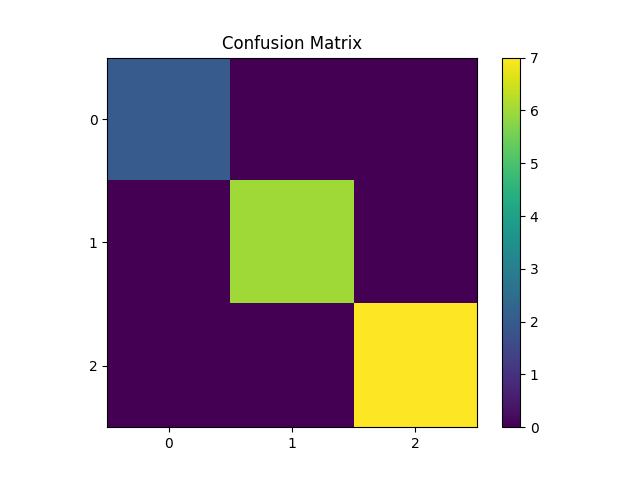

In [85]:
%matplotlib ipympl
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.set_title("Confusion Matrix")
plot = ax.imshow(conf_matrix,cmap="viridis")
fig.colorbar(plot)
plt.xticks(range(min(Y_iris_train),max(Y_iris_train)+1))
plt.yticks(range(min(Y_iris_train),max(Y_iris_train)+1))
plt.show()

## Decision Tree

<p align="center">
  <img src="../imgs/dectree.png"/ width=50%>
</p>